# ATIVIDADE DE APROFUNDAMENTO: TRILHA 4

### 1° PASSO - IMPORTANDO AS BIBLIOTECAS

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


### 2° PASSO - IMPORTANDO OS DATAFRAMES

In [107]:
morteporhiv = pd.read_csv(r'C:/Users/7234/Desktop/Jordasti/Especialização/Matérias/PARADIGMAS DE LINGUAGEM DE PROGRAMAÇÃO EM CIÊNCIA DE DADOS/Trilha 4 Estudos de caso de análise de dados I/annual_hiv_deaths_number_all_ages.csv')
infectadosporhiv = pd.read_csv(r'C:/Users/7234/Desktop/Jordasti/Especialização/Matérias/PARADIGMAS DE LINGUAGEM DE PROGRAMAÇÃO EM CIÊNCIA DE DADOS/Trilha 4 Estudos de caso de análise de dados I/newly_hiv_infected_number_all_ages.csv')


### 3° PASSO - TRATANDO OS DADOS

In [108]:
# Filtrando os Dataframes e renomeando colunas.
morteporhiv = morteporhiv[(morteporhiv.country == 'Argentina')]
morteporhiv = pd.melt(morteporhiv, id_vars=['country'])
morteporhiv = morteporhiv.rename(columns={'variable':'year', 'value':'mortes'})

infectadosporhiv = infectadosporhiv[(infectadosporhiv.country == 'Argentina')]
infectadosporhiv = pd.melt(infectadosporhiv, id_vars=['country'])
infectadosporhiv = infectadosporhiv.rename(columns={'variable':'year', 'value':'infectados'})


# Mesclanco os Dataframes.
dadoshiv = pd.merge(infectadosporhiv,morteporhiv,on=['country','year'])


# Substituindo dados e modificando o tipo de dados das colunas. 
dadoshiv['mortes'] = dadoshiv['mortes'].apply(lambda x: str(x).replace('k','000'))
dadoshiv['mortes'] = dadoshiv['mortes'].astype('float')

dadoshiv['infectados'] = dadoshiv['infectados'].apply(lambda x: str(x).replace('k','000'))
dadoshiv['infectados'] = dadoshiv['infectados'].astype('float')


dadoshiv['year'] = dadoshiv['year'].astype('int')

display(dadoshiv)

,country,year,infectados,mortes
0,Argentina,1989,4900.0,3000.0
1,Argentina,1990,5400.0,3200.0
2,Argentina,1991,5800.0,3400.0
3,Argentina,1992,6300.0,3600.0
4,Argentina,1993,6700.0,3800.0
5,Argentina,1994,6700.0,3500.0
6,Argentina,1995,6700.0,3200.0
7,Argentina,1996,6900.0,3100.0
8,Argentina,1997,7000.0,3000.0
9,Argentina,1998,7100.0,3000.0


### 4° PASSO - RESPONDENDO 4 PERGUNTAS

#### 1° Pergunta: Qual a média de mortes por HIV na Argentina nos ultimos 10 anos?

In [109]:
maiorano = dadoshiv['year'].max()

dadoshivnovo = dadoshiv.set_index('year') #Transformando a coluna ano no indice do dataframe.

anos = []
for ano in range(maiorano-9, maiorano+1):
    if dadoshivnovo.loc[ano, 'mortes'] == dadoshivnovo.loc[ano, 'mortes']: #Utilizando a propriedade que NaN não é igual a si mesma.
        anos.append(dadoshivnovo.loc[ano, 'mortes']) 

mediademortes = sum(anos)/10  

print(f'A média dos ultimos 10 anos de mortes por HIV na Argentina é de {mediademortes} mortes por ano.')


A média dos ultimos 10 anos de mortes por HIV na Argentina é de 2430.0 mortes por ano.


#### 2° Pergunta: Qual o ano que tivemos o menor número de infectados por HIV?

In [110]:
dadoshivnovo2 = dadoshiv.sort_values('infectados')
AnoComMenosInfectados = (dadoshivnovo2['year'][0])

print(f' O ano de {AnoComMenosInfectados} foi o ano com menor número de infectados por HIV na Argentiva')

 O ano de 1989 foi o ano com menor número de infectados por HIV na Argentiva


#### 3° Pergunta: Qual a porcentagem de mortes dos infectados no ano de 2007?

In [111]:
dadoshivnovo3 = dadoshiv[(dadoshiv.year == 2007)]

infectados = dadoshivnovo3['infectados'].sum()
mortes = dadoshivnovo3['mortes'].sum()

taxamorte = mortes/infectados

print('A taxa de morte de infectados por HIV no ano de 2007 na Argentina foi de {:.0%}.'.format(taxamorte))

A taxa de morte de infectados por HIV no ano de 2007 na Argentina foi de 40%.


#### 4° Pergunta: Plote um gráfico e analise a relação entre mortes e infectados por HIV?

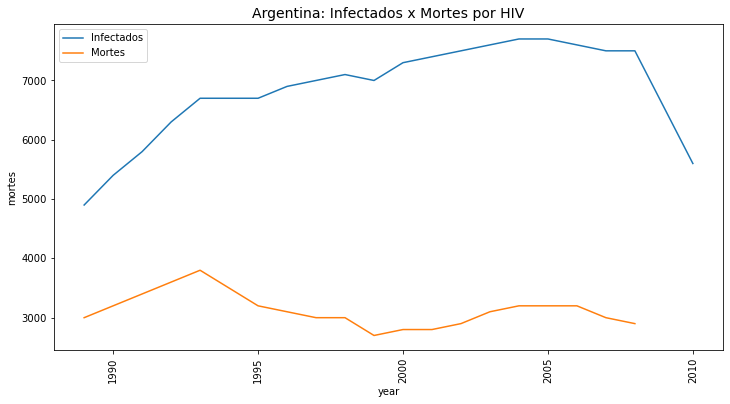

        Analisando o gráfico o número de mortes é sempre menor que o número de infectados, 
nos 5 primeiros anos a mortalidade subiu junto com a taxa de infectados, porém a partir do 
6° ano verificamos que o número de infectados continuou a subir porém, o número de mortes 
diminuiu, esse fato pode ser explicado pelo avanço e descoberta novos medicamentos 
mais eficazes contra HIV.


In [112]:
plt.figure(figsize=(12,6))

sns.lineplot(x=dadoshiv.year, y=dadoshiv.infectados, label='Infectados')
sns.lineplot(x=dadoshiv.year, y=dadoshiv.mortes, label='Mortes')

plt.title('Argentina: Infectados x Mortes por HIV', fontsize=14)
plt.legend()
plt.xticks(rotation=90)
plt.show()

print('''        Analisando o gráfico o número de mortes é sempre menor que o número de infectados, 
nos 5 primeiros anos a mortalidade subiu junto com a taxa de infectados, porém a partir do 
6° ano verificamos que o número de infectados continuou a subir porém, o número de mortes 
diminuiu, esse fato pode ser explicado pelo avanço e descoberta novos medicamentos 
mais eficazes contra HIV.''')